# Introduction

Explain...

# Idea

Explain what your idea is.

# Solution

## "Naive"/default solution

### "Naive" GHZ State

In [33]:
from qiskit import QuantumCircuit, execute, Aer

def generate_naive_ghz_state(qubit_amount):
    qc = QuantumCircuit(qubit_amount)

    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.measure_all()

    # Execute the circuit on a simulator
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    print(counts)
    return qc

    
generate_naive_ghz_state(3)

{'000': 505, '111': 519}


### "Naive" W State

In [20]:
from qiskit import QuantumCircuit, execute, Aer

def generate_naive_w_state(qubit_amount):
    qc = QuantumCircuit(qubit_amount)

    qc.h(0)
    qc.x(1)
    qc.x(2)
    qc.ch(0, 1)
    qc.ch(0, 2)
    qc.x(1)
    qc.x(2)

    qc.measure_all()

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    print(counts)

generate_naive_w_state(3)

{'001': 123, '111': 149, '011': 112, '101': 129, '000': 511}


## Your solution

### Generalized GHZ State

In [7]:
from qiskit import QuantumCircuit, execute, Aer

def generate_generalized_ghz_state(qubit_amount):
    #TODO:
    pass

### Generalized W State

In [5]:
from qiskit import QuantumCircuit, execute, Aer

def generate_generalized_w_state(qubit_amount):
    pass

# Results

In [18]:
# TODO: evaluate the 2 solutions
# the error rate when preparing the state (on a noisy simulator) should be low.
# Measurement Error Mitigation
# Import general libraries (needed for functions)
import numpy as np
import time

# Import Qiskit classes
import qiskit
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal, CompleteMeasFitter, TensoredMeasFitter)

In [25]:
# Generate the calibration circuits
def generate_calibration_circuits(qubit_amount):
    qr = qiskit.QuantumRegister(qubit_amount)
    # qubit_list = [2,3,4]
    meas_calibs, state_labels = complete_meas_cal(
        # qubit_list=qubit_list, 
        qr=qr, 
        circlabel='mcal')

    return meas_calibs, state_labels

generate_calibration_circuits(3)

([<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fee71a6aaf0>,
 ['000', '001', '010', '011', '100', '101', '110', '111'])

In [29]:
# Computing the Calibration Matrix
def compute_calibration_matrix(meas_calibs, state_labels):
    backend = qiskit.Aer.get_backend('qasm_simulator')
    job = qiskit.execute(meas_calibs, backend=backend, shots=1000)
    cal_results = job.result()
    
    # The calibration matrix without noise is the identity matrix
    meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
    print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

    print(meas_fitter.cal_matrix)

In [30]:
# Execution
qubit_amount=3
meas_calibs, state_labels=generate_calibration_circuits(qubit_amount)
compute_calibration_matrix(meas_calibs, state_labels)

Average Measurement Fidelity: 1.000000
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


## Plotting

In [68]:
# =========== FUNCTION DEFINITIONS ===========
# Reference: https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html

In [60]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeVigo

def plot_no_noise(circ):
    sim_ideal = AerSimulator()
    result = sim_ideal.run(transpile(circ, sim_ideal)).result()
    counts = result.get_counts(0)
    return counts

def plot_noise(circ):
    # Fake Provider Backends
    device_backend = FakeVigo()

    # vigo_simulator contains an approximate noise model consisting of:
    # - Single-qubit gate errors consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
    # - Two-qubit gate errors consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
    # - Single-qubit readout errors on the classical bit value obtained from measurements on individual qubits.
    sim_vigo = AerSimulator.from_backend(device_backend)

    # Transpile the circuit for the noisy basis gates
    tcirc = transpile(circ, sim_vigo)

    # Execute noisy simulation and get counts
    result_noise = sim_vigo.run(tcirc).result()
    counts_noise = result_noise.get_counts(0)
    return counts_noise    

In [61]:
# =========== EXECUTION ===========

In [70]:
# VARIABLES
qubit_amount=3

{'000': 516, '111': 508}


In [71]:
# PLOTTING: NO NOISE
# counts_no_noise=plot_no_noise(circ)
# plot_histogram(counts_no_noise, title=f"Ideal counts for {qubit_amount}-qubit GHZ state")

{'000': 484, '111': 540}


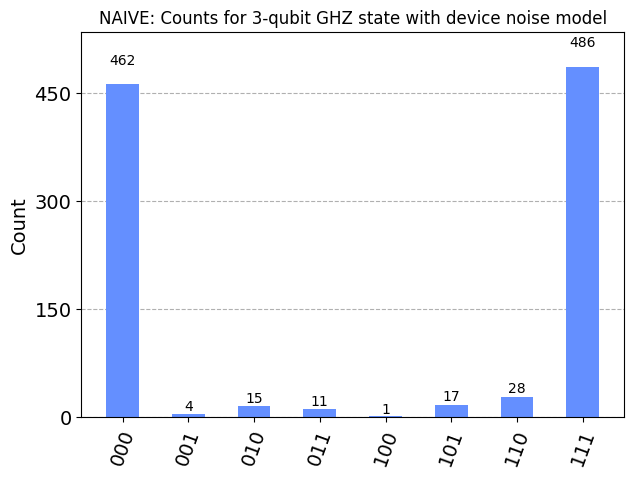

In [75]:
# PLOTTING: NOISE
circ = generate_naive_ghz_state(qubit_amount)
counts_noise=plot_noise(circ)
plot_histogram(counts_noise,
                   title=f"NAIVE: Counts for {qubit_amount}-qubit GHZ state with device noise model")

In [ ]:
generalized_circ = generate_generalized_ghz_state(qubit_amount)
counts_noise=plot_noise(generalized_circ)
plot_histogram(counts_noise,
                   title=f"generalized: Counts for {qubit_amount}-qubit GHZ state with device noise model")